In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Cleaned Data
df = pd.read_csv("Cleaned_Agriculture_Data.csv")
print("🔹 Dataset Shape:", df.shape)
print("🔹 Columns:", df.columns.tolist())

🔹 Dataset Shape: (16146, 80)
🔹 Columns: ['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name', 'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)', 'KHARIF SORGHUM AREA (1000 ha)', 'KHARIF SORGHUM PRODUCTION (1000 tons)', 'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)', 'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)', 'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)', 'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)', 'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)', 'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)', 'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)', 'FINGER MILLET PRODUCTION (1000 tons)', 'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)', 'BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)', 'CHICKPEA AREA (1000 ha)', 'CHICKPEA PRODUCTION (10

In [3]:
#Overview 
print("\n🔹 Data Summary:")
display(df.describe())

print("\n🔹 Unique States:", df['State Name'].nunique())
print("🔹 Unique Districts:", df['Dist Name'].nunique())
print("🔹 Year Range:", df['Year'].min(), "to", df['Year'].max())


🔹 Data Summary:


,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
count,16146.000000,16146.000000,16146.000000,1.614600e+04,1.614600e+04,16146.000000,16146.000000,1.614600e+04,16146.000000,16146.000000,...,16146.00000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,1.614600e+04
mean,269.769231,1991.496841,9.568562,1.285932e+05,2.248896e+05,1486.924784,77057.945621,1.820127e+05,1492.419859,22632.268054,...,4500.15306,28018.367397,7229.225195,124.644823,7750.477518,11086.249845,18677.876874,3177.038276,1194.603617,2.155033e+04
std,278.309125,15.011185,4.988538,1.600788e+05,3.266298e+05,956.185281,100394.478844,3.488343e+05,1081.255367,45062.714301,...,3153.97042,74239.648434,25042.132440,207.681147,13591.135203,18003.257384,25881.841784,8029.508625,4285.066744,6.006260e+04
min,1.000000,1966.000000,1.000000,-1.000000e+03,-1.000000e+03,-1.000000,-1000.000000,-1.000000e+03,-1.000000,-1000.000000,...,-1.00000,-1000.000000,-1000.000000,-1.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1.000000e+03
25%,78.000000,1978.000000,6.000000,1.040000e+04,9.460000e+03,800.000000,1770.000000,2.000000e+03,750.000000,0.000000,...,2000.00000,0.000000,0.000000,0.000000,310.000000,1600.000000,2520.000000,0.000000,60.000000,0.000000e+00
50%,156.000000,1991.000000,10.000000,6.680000e+04,9.584000e+04,1333.210000,36800.000000,4.270000e+04,1347.450000,2050.000000,...,4502.21000,50.000000,0.000000,0.000000,2220.000000,4740.000000,8945.000000,390.000000,280.000000,1.200000e+03
75%,241.000000,2005.000000,12.000000,1.913900e+05,3.157150e+05,2113.517500,123000.000000,2.151925e+05,2131.580000,20900.000000,...,6704.60500,10097.500000,2000.000000,202.270000,8790.000000,12510.000000,23570.000000,3150.000000,880.000000,1.676250e+04
max,917.000000,2017.000000,20.000000,1.154230e+06,3.215010e+06,5653.830000,879490.000000,4.305500e+06,5541.520000,334800.000000,...,22062.30000,800890.000000,376610.000000,5000.000000,159540.000000,200060.000000,240990.000000,111610.000000,131350.000000,1.162660e+06



🔹 Unique States: 20
🔹 Unique Districts: 311
🔹 Year Range: 1966 to 2017


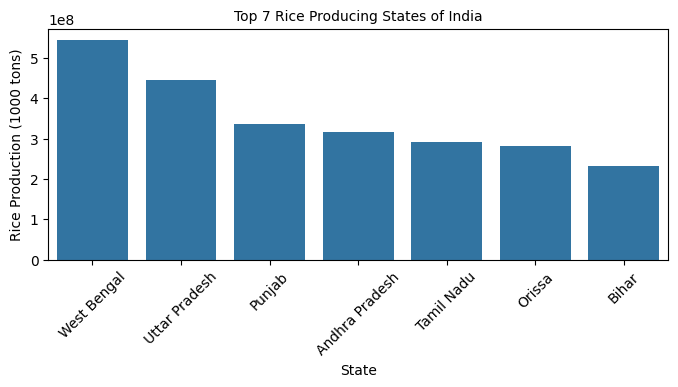

In [4]:
#1. TOP 7 RICE PRODUCTION STATES (Bar Plot)
rice_state = df.groupby("State Name")["RICE PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(8,3))
sns.barplot(x=rice_state.index, y=rice_state.values)
plt.title("Top 7 Rice Producing States of India", fontsize=10)
plt.xlabel("State")
plt.ylabel("Rice Production (1000 tons)")
plt.xticks(rotation=45)
plt.show()


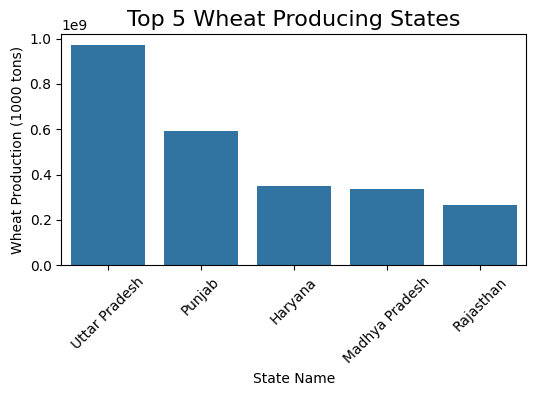

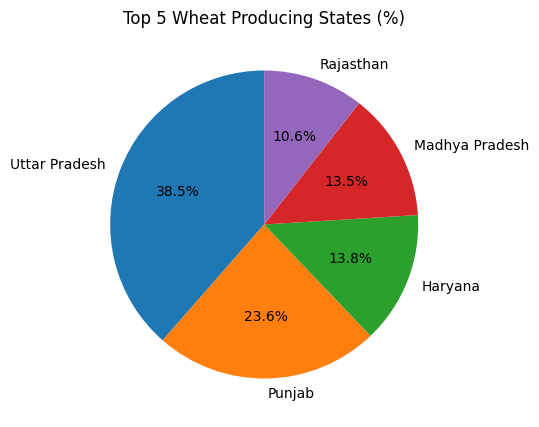

In [5]:
#2. TOP 5 WHEAT PRODUCING STATES (Bar + Pie Chart)
wheat_state = df.groupby("State Name")["WHEAT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(6,3))
sns.barplot(x=wheat_state.index, y=wheat_state.values)
plt.title("Top 5 Wheat Producing States", fontsize=16)
plt.ylabel("Wheat Production (1000 tons)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5,5))
plt.pie(wheat_state.values, labels=wheat_state.index, autopct="%1.1f%%", startangle=90)
plt.title("Top 5 Wheat Producing States (%)")
plt.show()


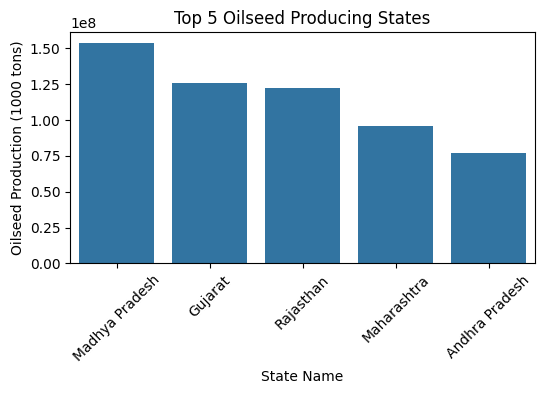

In [6]:
#3. TOP 5 OILSEED PRODUCING STATES
oil_state = df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(6,3))
sns.barplot(x=oil_state.index, y=oil_state.values)
plt.title("Top 5 Oilseed Producing States")
plt.xticks(rotation=45)
plt.ylabel("Oilseed Production (1000 tons)")
plt.show()


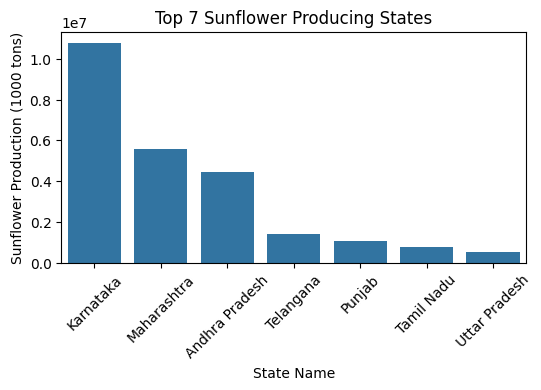

In [7]:
#4. TOP 7 SUNFLOWER PRODUCING STATES
sunflower_state = df.groupby("State Name")["SUNFLOWER PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7)

plt.figure(figsize=(6,3))
sns.barplot(x=sunflower_state.index, y=sunflower_state.values)
plt.title("Top 7 Sunflower Producing States")
plt.xticks(rotation=45)
plt.ylabel("Sunflower Production (1000 tons)")
plt.show()


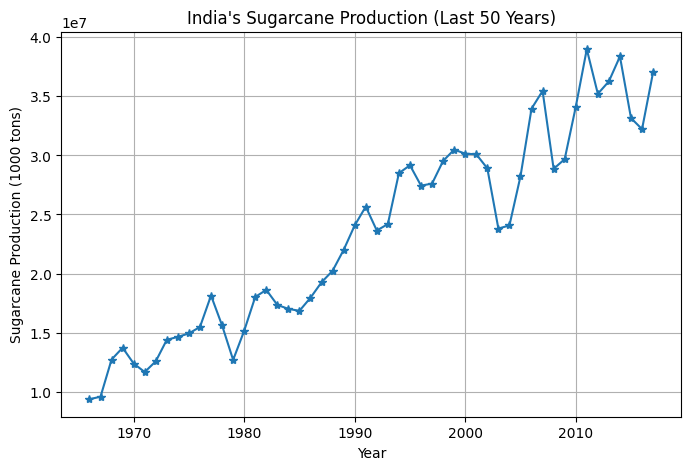

In [8]:
#5. India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
sugar_trend = df.groupby("Year")["SUGARCANE PRODUCTION (1000 tons)"].sum()

plt.figure(figsize=(8,5))
plt.plot(sugar_trend.index, sugar_trend.values, marker='*')
plt.title("India's Sugarcane Production (Last 50 Years)")
plt.xlabel("Year")
plt.ylabel("Sugarcane Production (1000 tons)")
plt.grid(True)
plt.show()

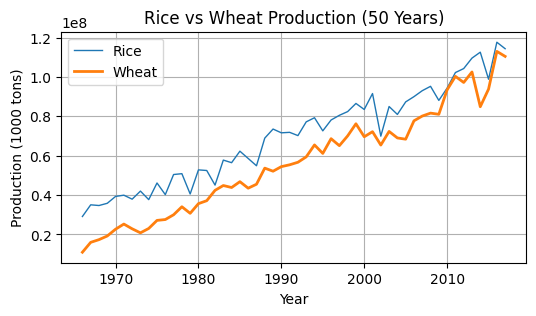

In [9]:
#6. Rice Production Vs Wheat Production (Last 50y)
rice = df.groupby("Year")["RICE PRODUCTION (1000 tons)"].sum()
wheat = df.groupby("Year")["WHEAT PRODUCTION (1000 tons)"].sum()

plt.figure(figsize=(6,3))
plt.plot(rice.index, rice.values, label="Rice", linewidth=1)#linewidth - thickness of line
plt.plot(wheat.index, wheat.values, label="Wheat", linewidth=2)
plt.title("Rice vs Wheat Production (50 Years)")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.legend() #Shows labels (“Rice” and “Wheat”)
plt.grid(True)
plt.show()


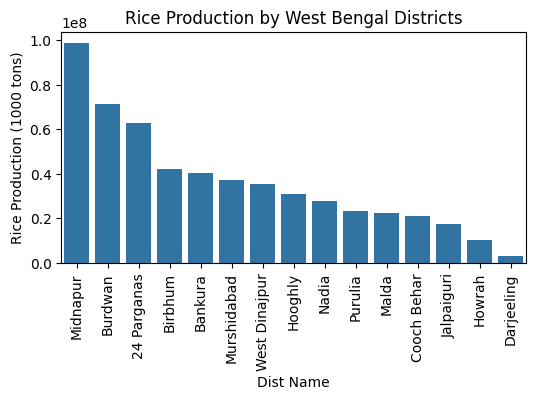

In [10]:
#7. Rice Production By West Bengal Districts
wb = df[df["State Name"] == "West Bengal"]
wb_rice = wb.groupby("Dist Name")["RICE PRODUCTION (1000 tons)"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,3))
sns.barplot(x=wb_rice.index, y=wb_rice.values)
plt.title("Rice Production by West Bengal Districts")
plt.xticks(rotation=90)
plt.ylabel("Rice Production (1000 tons)")
plt.show()


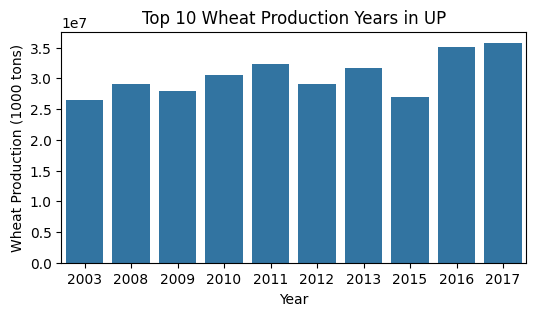

In [11]:
#8. Top 10 Wheat Production Years From UP
up = df[df["State Name"] == "Uttar Pradesh"]
up_wheat = up.groupby("Year")["WHEAT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,3))
sns.barplot(x=up_wheat.index, y=up_wheat.values)
plt.title("Top 10 Wheat Production Years in UP")
plt.xlabel("Year")
plt.ylabel("Wheat Production (1000 tons)")
plt.show()


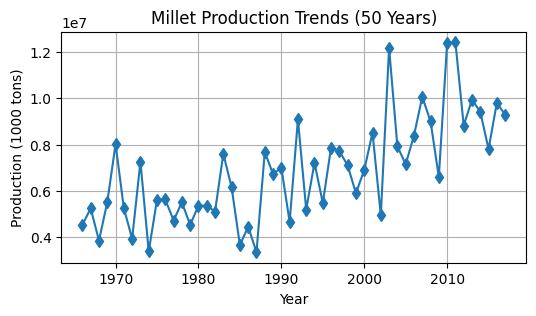

In [12]:
#9. Millet Production (Last 50y)
millet = df.groupby("Year")["PEARL MILLET PRODUCTION (1000 tons)"].sum()

plt.figure(figsize=(6,3))
plt.plot(millet.index, millet.values, marker='d')
plt.title("Millet Production Trends (50 Years)")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.grid(True)
plt.show()

10. Sorghum Production (Kharif and Rabi) by Region

In [13]:
region_map = {
    # NORTH
    "Punjab": "North", "Haryana": "North", "Uttar Pradesh": "North",
    "Uttarakhand": "North", "Delhi": "North", "Himachal Pradesh": "North",
    "Jammu & Kashmir": "North", "Chandigarh": "North",

    # EAST
    "Bihar": "East", "Jharkhand": "East", "Odisha": "East", "West Bengal": "East",

    # NORTH-EAST
    "Assam": "North-East", "Meghalaya": "North-East", "Manipur": "North-East",
    "Nagaland": "North-East", "Tripura": "North-East", "Mizoram": "North-East",
    "Arunachal Pradesh": "North-East",

    # WEST
    "Rajasthan": "West", "Gujarat": "West", "Goa": "West", "Maharashtra": "West",

    # CENTRAL
    "Madhya Pradesh": "Central", "Chhattisgarh": "Central",

    # SOUTH
    "Karnataka": "South", "Tamil Nadu": "South", "Telangana": "South",
    "Andhra Pradesh": "South", "Kerala": "South"
}

df["Region"] = df["State Name"].map(region_map)


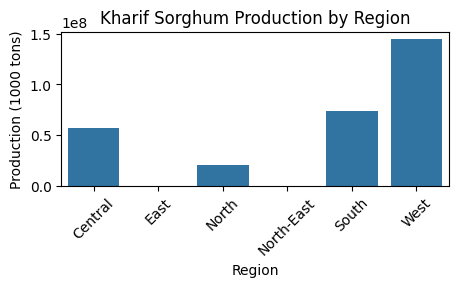

In [14]:

kharif = df.groupby("Region")["KHARIF SORGHUM PRODUCTION (1000 tons)"].sum()

plt.figure(figsize=(5,2))
sns.barplot(x=kharif.index, y=kharif.values)
plt.title("Kharif Sorghum Production by Region")
plt.xlabel("Region")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=45)
plt.show()

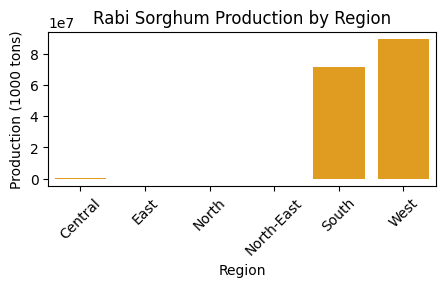

In [15]:
rabi = df.groupby("Region")["RABI SORGHUM PRODUCTION (1000 tons)"].sum()

plt.figure(figsize=(5,2))
sns.barplot(x=rabi.index, y=rabi.values, color='orange')
plt.title("Rabi Sorghum Production by Region")
plt.xlabel("Region")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=45)
plt.show()

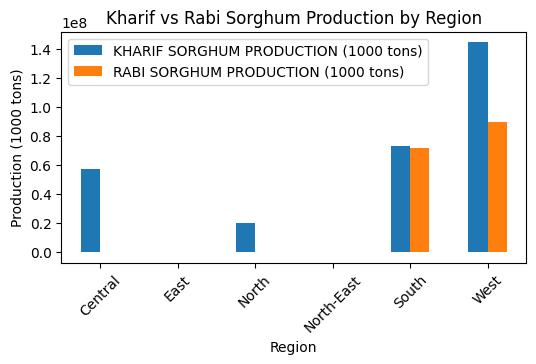

In [16]:
combined = df.groupby("Region")[[
    "KHARIF SORGHUM PRODUCTION (1000 tons)",
    "RABI SORGHUM PRODUCTION (1000 tons)"
]].sum()

combined.plot(kind='bar', figsize=(6,3))
plt.title("Kharif vs Rabi Sorghum Production by Region")
plt.ylabel("Production (1000 tons)")
plt.xticks(rotation=45)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8088\2936367342.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=groundnut_state.index, y=groundnut_state.values, palette="viridis")


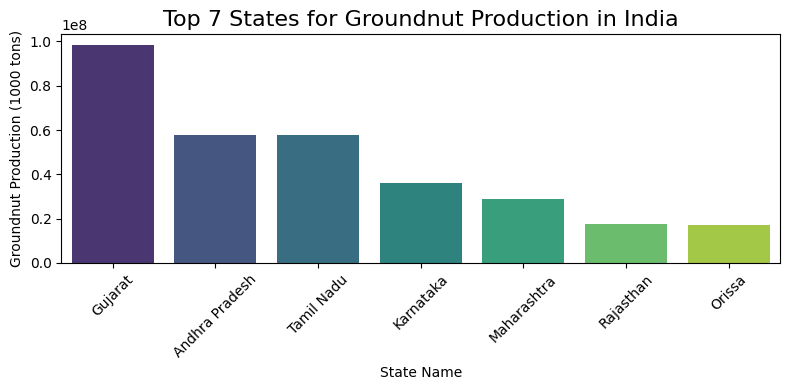

In [17]:
#11. Top 7 States for Groundnut Production
groundnut_state = (
    df.groupby("State Name")["GROUNDNUT PRODUCTION (1000 tons)"].sum().sort_values(ascending=False).head(7))
plt.figure(figsize=(8,4))
sns.barplot(x=groundnut_state.index, y=groundnut_state.values, palette="viridis")
groundnut_state
plt.title("Top 7 States for Groundnut Production in India", fontsize=16)
plt.ylabel("Groundnut Production (1000 tons)")
plt.xlabel("State Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

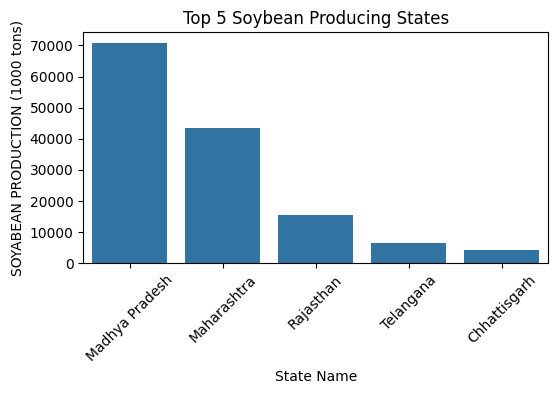

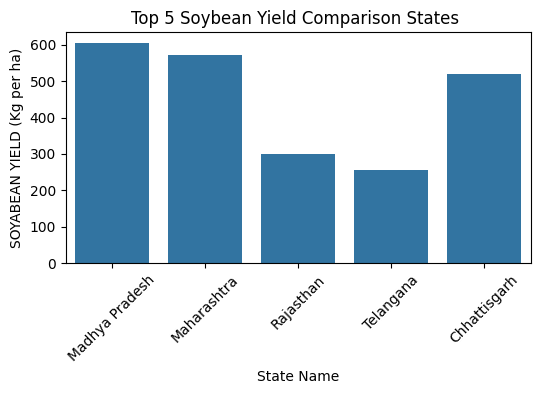

In [18]:
#12. Soybean Production by Top 5 States and Yield Efficiency
soy = df.groupby("State Name")[["SOYABEAN PRODUCTION (1000 tons)", "SOYABEAN YIELD (Kg per ha)"]].mean().sort_values("SOYABEAN PRODUCTION (1000 tons)", ascending=False).head(5)

plt.figure(figsize=(6,3))
sns.barplot(x=soy.index, y=soy["SOYABEAN PRODUCTION (1000 tons)"])
plt.title("Top 5 Soybean Producing States")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,3))
sns.barplot(x=soy.index, y=soy["SOYABEAN YIELD (Kg per ha)"])
plt.title("Top 5 Soybean Yield Comparison States ")
plt.xticks(rotation=45)
plt.show()


13. Oilseed Production in Major States

In [19]:
oil_states = (
    df.groupby("State Name")["OILSEEDS PRODUCTION (1000 tons)"]
    .sum()
    .sort_values(ascending=False)
    .head(10)   # Top 10 major states
)
oil_states


State Name
Madhya Pradesh    153594790.0
Gujarat           126224010.0
Rajasthan         122726860.0
Maharashtra        95567910.0
Andhra Pradesh     76888090.0
Tamil Nadu         55275030.0
Karnataka          52599040.0
Orissa             28453770.0
Uttar Pradesh      24015980.0
Haryana            24006600.0
Name: OILSEEDS PRODUCTION (1000 tons), dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_8088\2717937226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


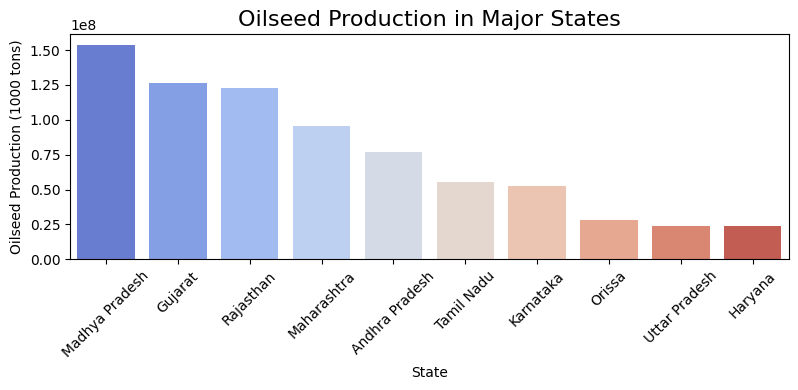

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(
    x=oil_states.index,
    y=oil_states.values,
    palette="coolwarm"
)
plt.title("Oilseed Production in Major States", fontsize=16)
plt.xlabel("State")
plt.ylabel("Oilseed Production (1000 tons)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



14. Impact of Area Cultivated on Production (Rice, Wheat, Maize)

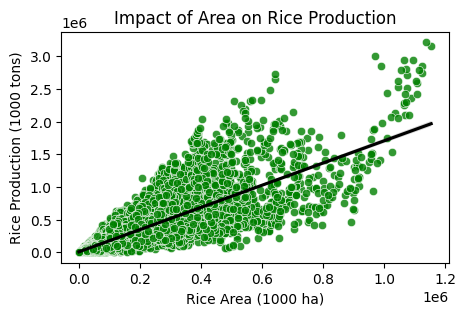

In [21]:
#RICE — Area vs Production
plt.figure(figsize=(5,3))
sns.scatterplot(
    data=df,
    x="RICE AREA (1000 ha)",
    y="RICE PRODUCTION (1000 tons)",
    alpha=0.8,  #alpha controls transparency of the points(0-1)
    color="green"
)
sns.regplot(
    data=df,
    x="RICE AREA (1000 ha)",
    y="RICE PRODUCTION (1000 tons)",
    scatter=False,
    color="black"
)
plt.title("Impact of Area on Rice Production")
plt.xlabel("Rice Area (1000 ha)")
plt.ylabel("Rice Production (1000 tons)")
plt.show()
#When rice area increases → rice production also increases

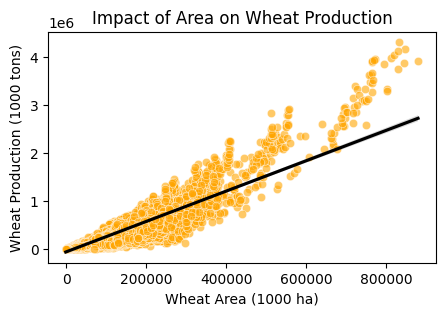

In [22]:
#WHEAT — Area vs Production
plt.figure(figsize=(5,3))
sns.scatterplot(
    data=df,
    x="WHEAT AREA (1000 ha)",
    y="WHEAT PRODUCTION (1000 tons)",
    alpha=0.6,
    color="orange"
)
sns.regplot(
    data=df,
    x="WHEAT AREA (1000 ha)",
    y="WHEAT PRODUCTION (1000 tons)",
    scatter=False,
    color="black"
)
plt.title("Impact of Area on Wheat Production")
plt.xlabel("Wheat Area (1000 ha)")
plt.ylabel("Wheat Production (1000 tons)")
plt.show()


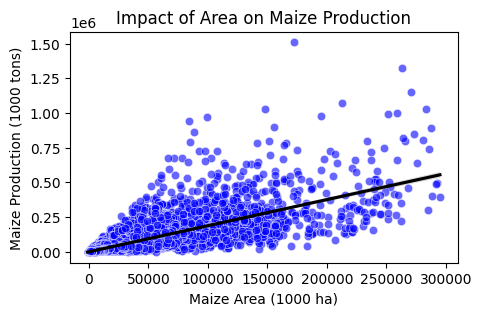

In [23]:
#MAIZE — Area vs Production
plt.figure(figsize=(5,3))
sns.scatterplot(
    data=df,
    x="MAIZE AREA (1000 ha)",
    y="MAIZE PRODUCTION (1000 tons)",
    alpha=0.6,
    color="blue"
)
sns.regplot(
    data=df,
    x="MAIZE AREA (1000 ha)",
    y="MAIZE PRODUCTION (1000 tons)",
    scatter=False,
    color="black"
)#sns.regplot()-It draws the straight “best-fit” line through the scatter points.
plt.title("Impact of Area on Maize Production")
plt.xlabel("Maize Area (1000 ha)")
plt.ylabel("Maize Production (1000 tons)")
plt.show()


| Crop      | Relationship Strength    | Explanation                                             |
| --------- | ------------------------ | ------------------------------------------------------- |
| **Rice**  | Strong positive          | More area → more production; irrigation-supported crop. |
| **Wheat** | Strong–Moderate positive | Winter crop; area strongly affects output.              |
| **Maize** | Moderate positive        | Dependent on rainfall; yields fluctuate.                |

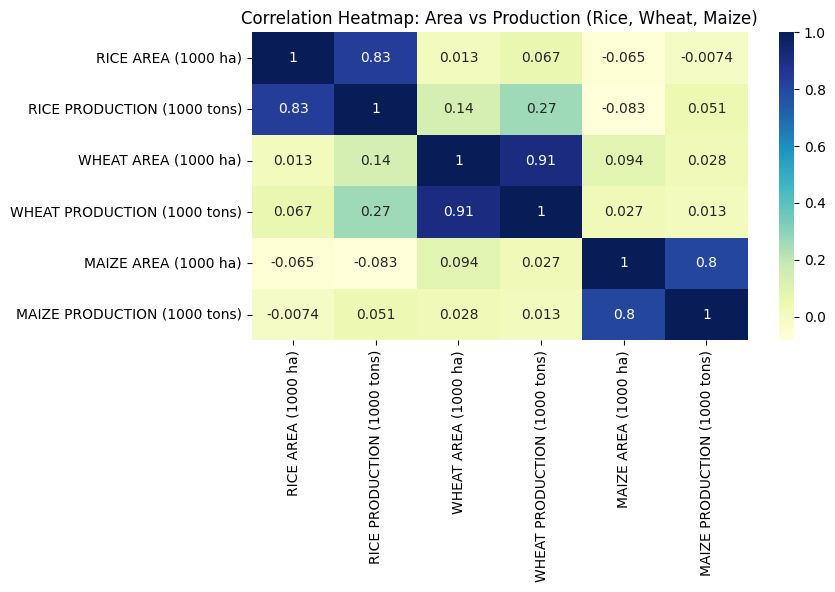

In [24]:
#14. Impact of Area Cultivated on Production (Rice, Wheat, Maize)
area_prod_corr = df[[
    "RICE AREA (1000 ha)", "RICE PRODUCTION (1000 tons)",
    "WHEAT AREA (1000 ha)", "WHEAT PRODUCTION (1000 tons)",
    "MAIZE AREA (1000 ha)", "MAIZE PRODUCTION (1000 tons)"
]].corr() #.corr() calculates correlation values between every pair of these columns.
#[+1(possitive relation),0(no relation),-1(negative relation)]

plt.figure(figsize=(8,4))
sns.heatmap(area_prod_corr, annot=True, cmap="YlGnBu")
#annot=True = writes the actual correlation values on the heatmap.
#cmap="YlGnBu" = color style: Yellow(-1) → Green(0) → Blue(+1).
plt.title("Correlation Heatmap: Area vs Production (Rice, Wheat, Maize)")
plt.show()

In [25]:
print("Correlation between Area and Production:")
print("Rice:", df["RICE AREA (1000 ha)"].corr(df["RICE PRODUCTION (1000 tons)"]))
print("Wheat:", df["WHEAT AREA (1000 ha)"].corr(df["WHEAT PRODUCTION (1000 tons)"]))
print("Maize:", df["MAIZE AREA (1000 ha)"].corr(df["MAIZE PRODUCTION (1000 tons)"]))

Correlation between Area and Production:
Rice: 0.8325153171810162
Wheat: 0.9106426278224171
Maize: 0.802003087235278


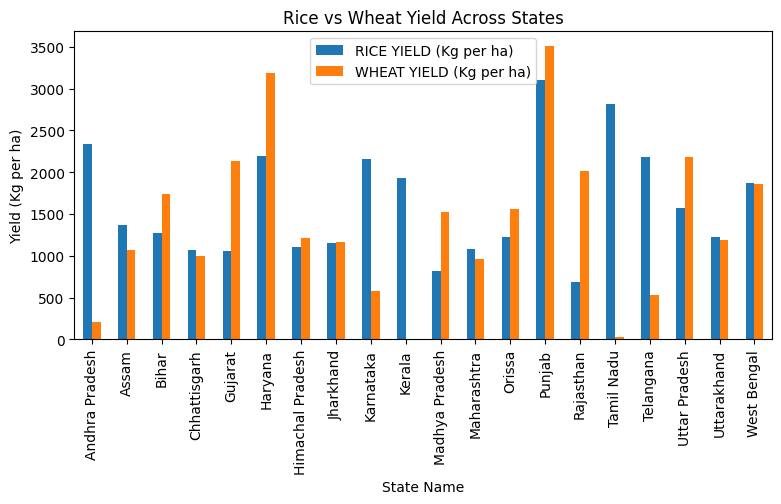

In [26]:
#15. Rice vs. Wheat Yield Across States
yield_df = df.groupby("State Name")[["RICE YIELD (Kg per ha)", "WHEAT YIELD (Kg per ha)"]].mean() #average of rice and wheat yeild

yield_df.plot(kind="bar", figsize=(9,4))
plt.title("Rice vs Wheat Yield Across States")
plt.ylabel("Yield (Kg per ha)")
plt.xticks(rotation=90)
plt.show()
